In [38]:
#Includes necesarios
from sklearn.neighbors import KNeighborsClassifier

import pandas as pd
import numpy as np
from sklearn.model_selection import RandomizedSearchCV

from preprocessing import get_train_validation
from preprocessing import apply_OHE,estandarize,normalize

from sklearn.metrics import classification_report
from plot_metrics import plot_cm, plot_roc_curve

# KNN

## Preprocesamiento: OHE

Obtenemos los datos de entrenamiento y de validacion

In [39]:
X_train, X_validation, y_train, y_validation = get_train_validation()

Para entrenar KNN necesitamos aplicar OHE en las columnas categoricas, para esto llamamos a la funcion de preprocesamiento **aplicar_OHE**:

In [40]:
X_train = apply_OHE(X_train)
X_validation = apply_OHE(X_validation)

Busco los mejores hiperparametros para el arbol de decision con randomsearch:

In [41]:
'''params = {
    'n_neighbors': np.arange(200, 300),
    'weights': ["uniform","distance"],
}

clf = KNeighborsClassifier()

rgscv = RandomizedSearchCV(
    clf, params, n_iter=60, scoring='accuracy', n_jobs=-1, cv=5, return_train_score=True
).fit(X_train, y_train)

print(f"Best score: {rgscv.best_score_}")
print(f"Best params {rgscv.best_params_}")
n_neighbors = rgscv.best_params_.get("n_neighbors")
weights = rgscv.best_params_.get("weights")'''

'params = {\n    \'n_neighbors\': np.arange(200, 300),\n    \'weights\': ["uniform","distance"],\n}\n\nclf = KNeighborsClassifier()\n\nrgscv = RandomizedSearchCV(\n    clf, params, n_iter=60, scoring=\'accuracy\', n_jobs=-1, cv=5, return_train_score=True\n).fit(X_train, y_train)\n\nprint(f"Best score: {rgscv.best_score_}")\nprint(f"Best params {rgscv.best_params_}")\nn_neighbors = rgscv.best_params_.get("n_neighbors")\nweights = rgscv.best_params_.get("weights")'

Armo el modelo de KNN con los hiperparametros calculados:

In [42]:
model_knn = KNeighborsClassifier(n_neighbors=21,weights='distance')

Entreno el modelo con el train set:

In [43]:
model_knn.fit(X_train, y_train)

C:\Users\lbca-pc\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


KNeighborsClassifier(n_neighbors=21, weights='distance')

Predigo con el validation set:

In [44]:
knn_predict = model_knn.predict(X_validation)

## Metricas

In [45]:
print(classification_report(y_validation, knn_predict))

              precision    recall  f1-score   support

           0       0.88      0.92      0.90      4945
           1       0.71      0.62      0.66      1568

    accuracy                           0.85      6513
   macro avg       0.80      0.77      0.78      6513
weighted avg       0.84      0.85      0.84      6513



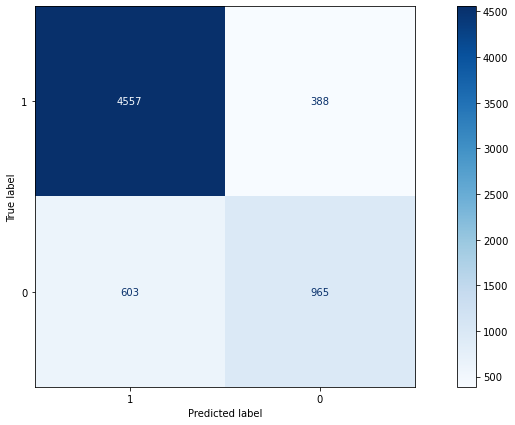

In [46]:
plot_cm(model_knn, X_validation, y_validation)

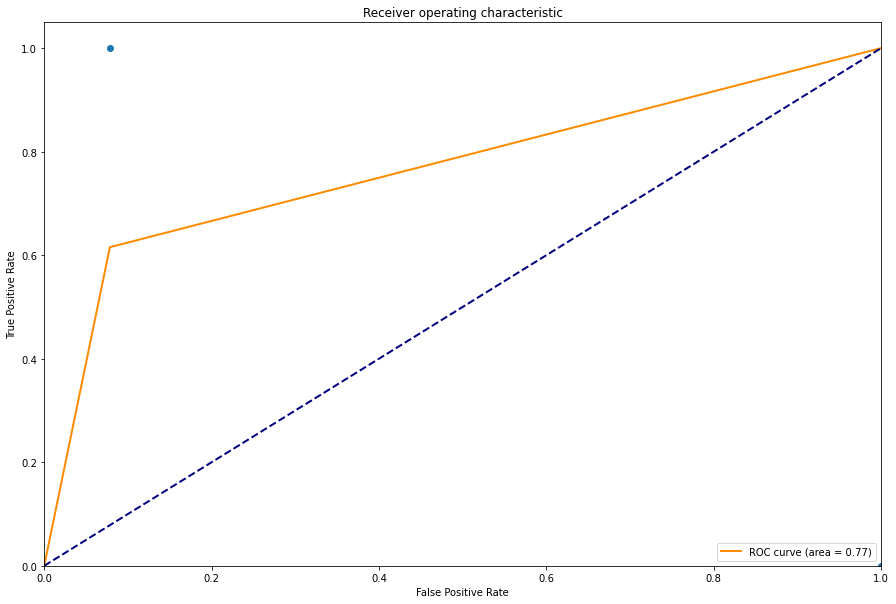

In [47]:
plot_roc_curve(y_validation,knn_predict)

## Preprocesamiento: OHE + ESTANDARIZACION

Obtenemos los datos de entrenamiento y de validacion

In [48]:
X_train, X_validation, y_train, y_validation = get_train_validation()

Para entrenar KNN necesitamos aplicar OHE en las columnas categoricas, para esto llamamos a la funcion de preprocesamiento **apply_OHE** y **estandarized**:

In [49]:
X_train = apply_OHE(X_train)
X_train = estandarize(X_train)
X_validation = apply_OHE(X_validation)
X_validation = estandarize(X_validation)

Busco los mejores hiperparametros para el arbol de decision con randomsearch:

In [50]:
'''params = {
    'n_neighbors': np.arange(200, 300),
    'weights': ["uniform","distance"],
}

clf = KNeighborsClassifier()

rgscv = RandomizedSearchCV(
    clf, params, n_iter=60, scoring='accuracy', n_jobs=-1, cv=5, return_train_score=True
).fit(X_train, y_train)

print(f"Best score: {rgscv.best_score_}")
print(f"Best params {rgscv.best_params_}")
n_neighbors = rgscv.best_params_.get("n_neighbors")
weights = rgscv.best_params_.get("weights")'''

'params = {\n    \'n_neighbors\': np.arange(200, 300),\n    \'weights\': ["uniform","distance"],\n}\n\nclf = KNeighborsClassifier()\n\nrgscv = RandomizedSearchCV(\n    clf, params, n_iter=60, scoring=\'accuracy\', n_jobs=-1, cv=5, return_train_score=True\n).fit(X_train, y_train)\n\nprint(f"Best score: {rgscv.best_score_}")\nprint(f"Best params {rgscv.best_params_}")\nn_neighbors = rgscv.best_params_.get("n_neighbors")\nweights = rgscv.best_params_.get("weights")'

Armo el modelo de KNN con los hiperparametros calculados:

In [51]:
model_knn = KNeighborsClassifier(n_neighbors=21,weights='distance')

Entreno el modelo con el train set:

In [52]:
model_knn.fit(X_train, y_train)

C:\Users\lbca-pc\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


KNeighborsClassifier(n_neighbors=21, weights='distance')

Predigo con el validation set:

In [53]:
knn_predict = model_knn.predict(X_validation)

## Metricas

In [54]:
print(classification_report(y_validation, knn_predict))

              precision    recall  f1-score   support

           0       0.87      0.90      0.89      4945
           1       0.65      0.58      0.62      1568

    accuracy                           0.83      6513
   macro avg       0.76      0.74      0.75      6513
weighted avg       0.82      0.83      0.82      6513



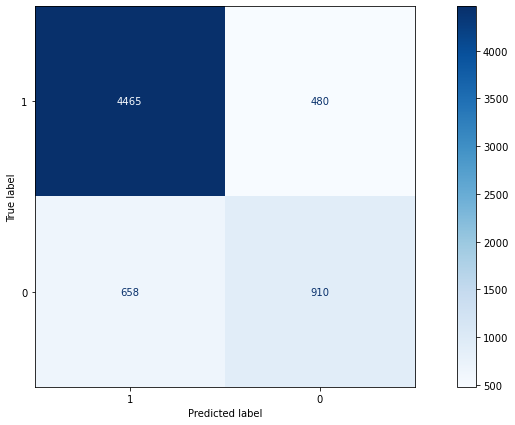

In [55]:
plot_cm(model_knn, X_validation, y_validation)

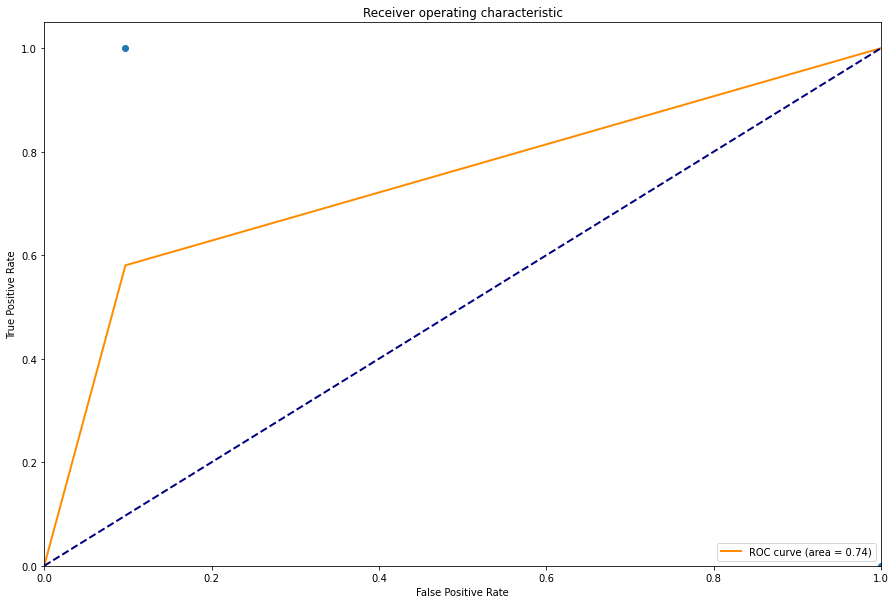

In [56]:
plot_roc_curve(y_validation,knn_predict)

## Preprocesamiento: OHE + NORMALIZACION

Obtenemos los datos de entrenamiento y de validacion

In [57]:
X_train, X_validation, y_train, y_validation = get_train_validation()

Para entrenar KNN necesitamos aplicar OHE en las columnas categoricas, para esto llamamos a la funcion de preprocesamiento **apply_OHE** y **estandarized**:

In [58]:
X_train = apply_OHE(X_train)
X_train = normalize(X_train)
X_validation = apply_OHE(X_validation)
X_validation = normalize(X_validation)

Busco los mejores hiperparametros para el arbol de decision con randomsearch:

In [59]:
'''params = {
    'n_neighbors': np.arange(200, 300),
    'weights': ["uniform","distance"],
}

clf = KNeighborsClassifier()

rgscv = RandomizedSearchCV(
    clf, params, n_iter=60, scoring='accuracy', n_jobs=-1, cv=5, return_train_score=True
).fit(X_train, y_train)

print(f"Best score: {rgscv.best_score_}")
print(f"Best params {rgscv.best_params_}")
n_neighbors = rgscv.best_params_.get("n_neighbors")
weights = rgscv.best_params_.get("weights")'''

'params = {\n    \'n_neighbors\': np.arange(200, 300),\n    \'weights\': ["uniform","distance"],\n}\n\nclf = KNeighborsClassifier()\n\nrgscv = RandomizedSearchCV(\n    clf, params, n_iter=60, scoring=\'accuracy\', n_jobs=-1, cv=5, return_train_score=True\n).fit(X_train, y_train)\n\nprint(f"Best score: {rgscv.best_score_}")\nprint(f"Best params {rgscv.best_params_}")\nn_neighbors = rgscv.best_params_.get("n_neighbors")\nweights = rgscv.best_params_.get("weights")'

Armo el modelo de KNN con los hiperparametros calculados:

In [60]:
model_knn = KNeighborsClassifier(n_neighbors=21,weights='distance')

Entreno el modelo con el train set:

In [61]:
model_knn.fit(X_train, y_train)

C:\Users\lbca-pc\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


KNeighborsClassifier(n_neighbors=21, weights='distance')

Predigo con el validation set:

In [62]:
knn_predict = model_knn.predict(X_validation)

## Metricas

In [63]:
print(classification_report(y_validation, knn_predict))

              precision    recall  f1-score   support

           0       0.88      0.91      0.89      4945
           1       0.67      0.60      0.63      1568

    accuracy                           0.83      6513
   macro avg       0.77      0.75      0.76      6513
weighted avg       0.83      0.83      0.83      6513



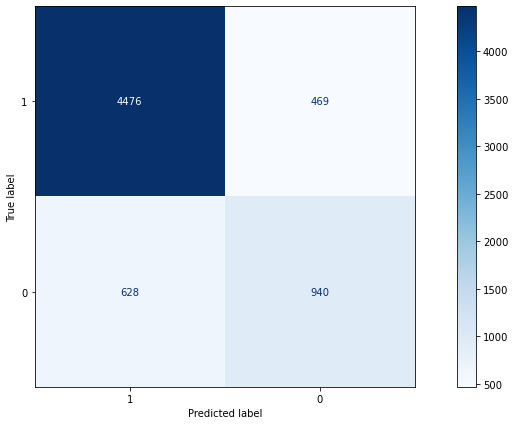

In [64]:
plot_cm(model_knn, X_validation, y_validation)

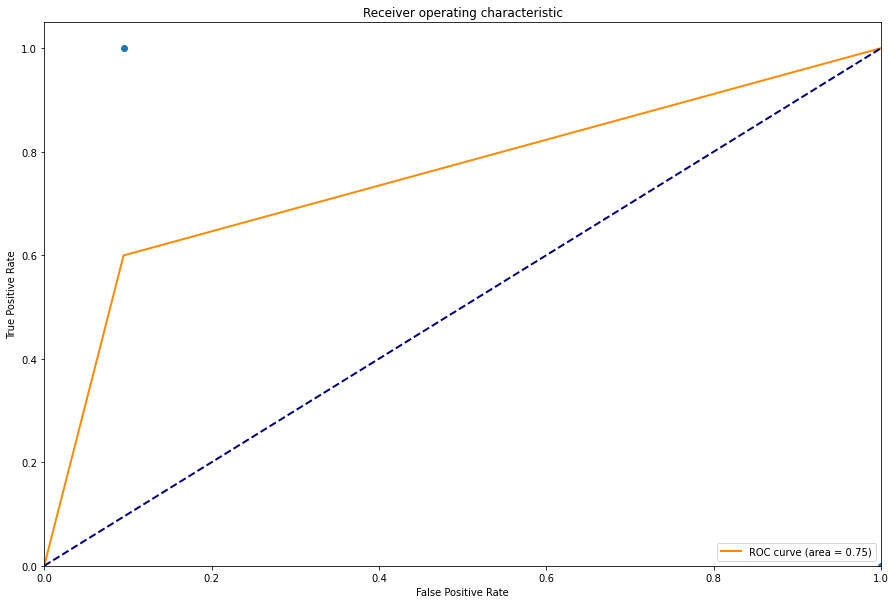

In [65]:
plot_roc_curve(y_validation,knn_predict)